

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# data normalization with sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split

#for classification
from sklearn.metrics import classification_report

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn import linear_model

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Lasso

from sklearn import metrics

In [ ]:
#loading newly created dataset
df=pd.read_csv('/content/dataset (1).csv')

#Preprocessing of newly created Dataset

In [ ]:
#getting top rows of merged dataset
df.head()

VAERS_ID STATE  ...  VAX_DOSE_SERIES                             VAX_NAME
0    916600    TX  ...                1          COVID19 (COVID19 (MODERNA))
1    916601    CA  ...                1          COVID19 (COVID19 (MODERNA))
2    916602    WA  ...                1  COVID19 (COVID19 (PFIZER-BIONTECH))
3    916603    WA  ...              UNK          COVID19 (COVID19 (MODERNA))
4    916604    TX  ...                1          COVID19 (COVID19 (MODERNA))

[5 rows x 14 columns]

In [ ]:
#getting shape of merged dataset
df.shape

(62354, 14)

In [ ]:
#checking data types
df.dtypes

VAERS_ID             int64
STATE               object
AGE_YRS            float64
SEX                 object
EFFECTIVENESS       object
RECOVD              object
VAX_DATE            object
V_ADMINBY           object
ALLERGIES           object
SYMPTOM             object
VAX_TYPE            object
VAX_MANU            object
VAX_DOSE_SERIES     object
VAX_NAME            object
dtype: object

In [ ]:
#Getting Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62354 entries, 0 to 62353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         62354 non-null  int64  
 1   STATE            54544 non-null  object 
 2   AGE_YRS          58308 non-null  float64
 3   SEX              62354 non-null  object 
 4   EFFECTIVENESS    62352 non-null  object 
 5   RECOVD           57619 non-null  object 
 6   VAX_DATE         60590 non-null  object 
 7   V_ADMINBY        62354 non-null  object 
 8   ALLERGIES        38108 non-null  object 
 9   SYMPTOM          62354 non-null  object 
 10  VAX_TYPE         62354 non-null  object 
 11  VAX_MANU         62354 non-null  object 
 12  VAX_DOSE_SERIES  62270 non-null  object 
 13  VAX_NAME         62354 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 6.7+ MB


In [ ]:
#Getting statistics of dataframe 
df.describe()

VAERS_ID       AGE_YRS
count  6.235400e+04  58308.000000
mean   9.682160e+05     49.972072
std    6.325396e+04     17.916382
min    8.966360e+05      0.080000
25%    9.178412e+05     36.000000
50%    9.314355e+05     48.000000
75%    1.036666e+06     62.000000
max    1.115348e+06    115.000000

#Exploratory data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


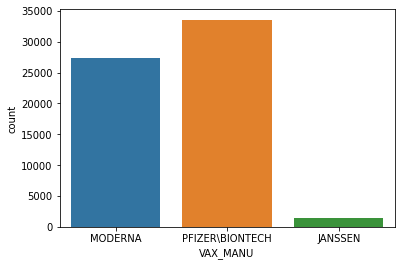

In [ ]:
#plotting the details of vaccine names and recived details
sns.countplot(df["VAX_MANU"])

PFIZER\BIONTECH's vaccine has the most number of cases where recievers were reported.

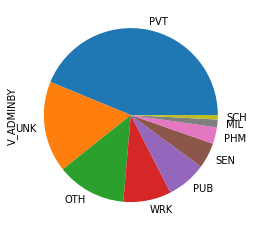

In [ ]:
#details about administrations which provide vaccine
df["V_ADMINBY"].value_counts().plot(kind='pie')

Most of the vaccine provided by private bodies

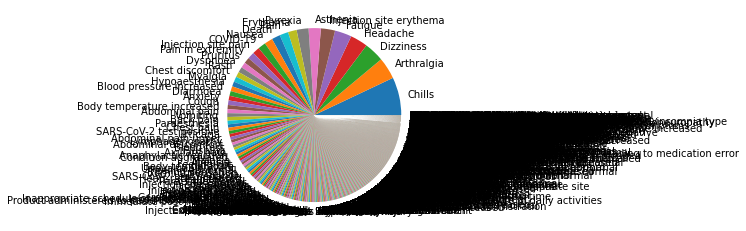

In [ ]:
#giving the most recently shown symptoms
df['SYMPTOM'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

chill is the most visible symptom

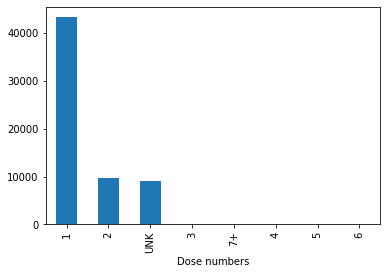

In [ ]:
#details about vaccination dose
df['VAX_DOSE_SERIES'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Dose numbers')
plt.show()

Most of the peplw recived the fist dose

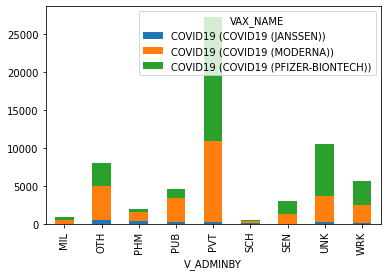

In [ ]:
#relation between vaccine provider and vaccine name
pd.crosstab(df["V_ADMINBY"],df["VAX_NAME"]).plot(kind='bar',stacked=True)
plt.show()

Private bodies have administered the largest amount of vaccinations Of moderna/pfizer. Whereas other undisclosed bodies have administered janssen vaccine the most

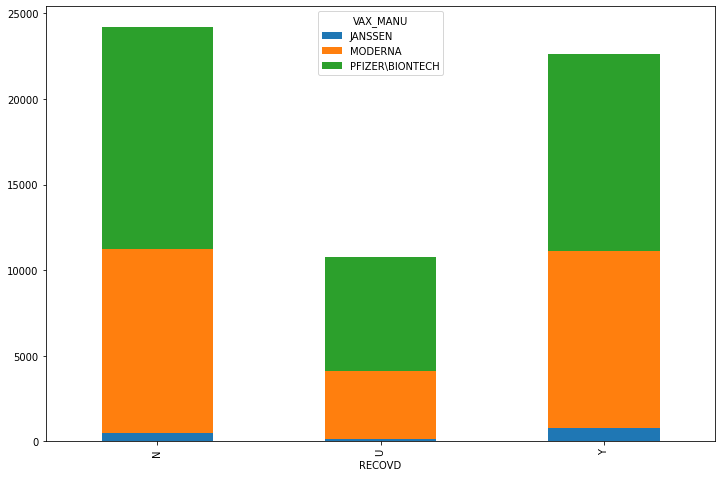

In [ ]:
#relation between vaccine name and recovery
plt.rcParams['figure.figsize'] = (12,8)
pd.crosstab(df["RECOVD"],df["VAX_MANU"]).plot(kind='bar',stacked=True)
plt.show()

The above graph tells us that Not Recovered from adverse effects of vaccine ("N")

- the count is max
 
- people unable to recover from adverse effects are in order:  MODERNA>PFIZER>JANSSEN

Recovered from adverse effects of vaccine ("Y")

- people able to recover from adverse effects are in order: MODERNA>PFIZER>JANSSEN

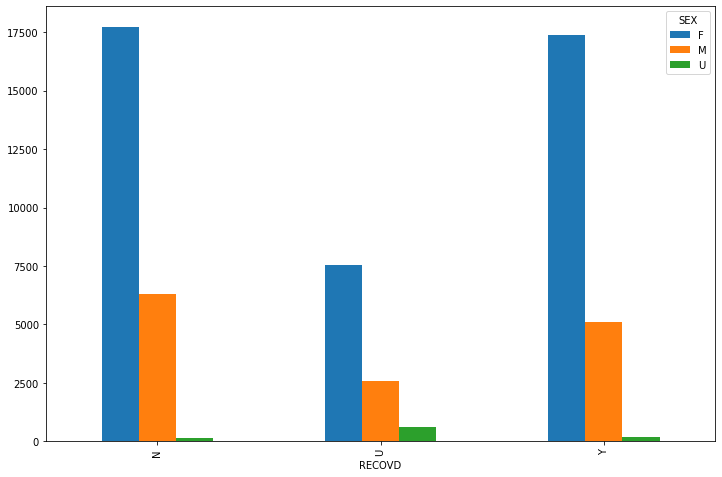

In [ ]:
#relation between gender and recovery
pd.crosstab(df["RECOVD"],df["SEX"]).plot(kind='bar')
plt.show()

The recovery of the FEMAlE gender is the higher in comparison to any other gender for any of the covid vaccines

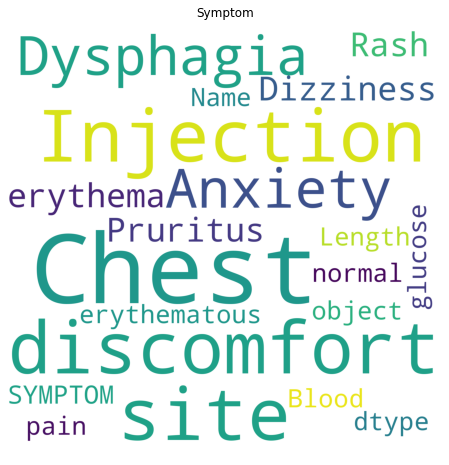

In [ ]:
#The most occured symptoms across different vaccinations for covid19

from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = set(list(STOPWORDS) + ['|']),background_color = 'white',
                      height =2000,
                      width = 2000
                     ).generate(str(df["SYMPTOM"]))
plt.rcParams['figure.figsize'] = (12,8)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Symptom")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


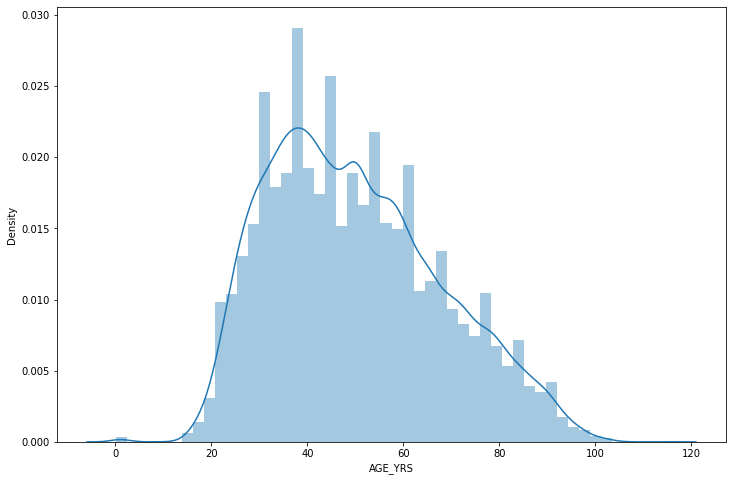

In [ ]:
#density graph for age
sns.distplot(df["AGE_YRS"])

age between 30 to 58 are vaccinated

# Cleaning data

In [ ]:
#null value treatment
df.isnull().sum()

VAERS_ID               0
STATE               7810
AGE_YRS             4046
SEX                    0
EFFECTIVENESS          2
RECOVD              4735
VAX_DATE            1764
V_ADMINBY              0
ALLERGIES          24246
SYMPTOM                0
VAX_TYPE               0
VAX_MANU               0
VAX_DOSE_SERIES       84
VAX_NAME               0
dtype: int64

In [ ]:
# Percent nulls in categorical columns 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
Percent

ALLERGIES          38.884434
STATE              12.525259
RECOVD              7.593739
AGE_YRS             6.488758
VAX_DATE            2.829009
VAX_DOSE_SERIES     0.134715
EFFECTIVENESS       0.003207
VAX_NAME            0.000000
VAX_MANU            0.000000
VAX_TYPE            0.000000
SYMPTOM             0.000000
V_ADMINBY           0.000000
SEX                 0.000000
VAERS_ID            0.000000
dtype: float64

In [ ]:
#duplicate handling
df[df.duplicated(keep='first')]

VAERS_ID STATE  ...  VAX_DOSE_SERIES                             VAX_NAME
3303     919453    CA  ...                1  COVID19 (COVID19 (PFIZER-BIONTECH))
3305     919453    CA  ...                1  COVID19 (COVID19 (PFIZER-BIONTECH))
6078     921953    AK  ...                1          COVID19 (COVID19 (MODERNA))
6963     922731    LA  ...                1  COVID19 (COVID19 (PFIZER-BIONTECH))
6965     922731    LA  ...                1  COVID19 (COVID19 (PFIZER-BIONTECH))
...         ...   ...  ...              ...                                  ...
59814    914458    NV  ...                1  COVID19 (COVID19 (PFIZER-BIONTECH))
61184    915630    IA  ...              UNK          COVID19 (COVID19 (MODERNA))
61186    915630    IA  ...              UNK          COVID19 (COVID19 (MODERNA))
61188    915630    IA  ...              UNK          COVID19 (COVID19 (MODERNA))
61444    915849    KS  ...                1          COVID19 (COVID19 (MODERNA))

[120 rows x 14 columns]

In [ ]:
#droping duplicate rows
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
#checking for droped rows
df[df.duplicated(keep='first')]

Empty DataFrame
Columns: [VAERS_ID, STATE, AGE_YRS, SEX, EFFECTIVENESS, RECOVD, VAX_DATE, V_ADMINBY, ALLERGIES, SYMPTOM, VAX_TYPE, VAX_MANU, VAX_DOSE_SERIES, VAX_NAME]
Index: []

In [ ]:
df.shape

(62234, 14)

In [ ]:
#drop two columns which couldn't make change in analysis
df.drop(['STATE','V_ADMINBY'],axis=1,inplace=True)


In [ ]:
#getting shape after removing two columns
df.shape

(62234, 12)

In [ ]:
#dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62234 entries, 0 to 62353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VAERS_ID         62234 non-null  int64  
 1   AGE_YRS          58188 non-null  float64
 2   SEX              62234 non-null  object 
 3   EFFECTIVENESS    62232 non-null  object 
 4   RECOVD           57504 non-null  object 
 5   VAX_DATE         60470 non-null  object 
 6   ALLERGIES        38003 non-null  object 
 7   SYMPTOM          62234 non-null  object 
 8   VAX_TYPE         62234 non-null  object 
 9   VAX_MANU         62234 non-null  object 
 10  VAX_DOSE_SERIES  62150 non-null  object 
 11  VAX_NAME         62234 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 6.2+ MB


In [ ]:
# convert column with object to date time
df['VAX_DATE'] = pd.to_datetime(df['VAX_DATE'])

In [ ]:
#taking the value count in vaccine dose column
df["VAX_DOSE_SERIES"].value_counts()

1      43256
2       9703
UNK     9039
3         68
7+        41
4         20
5         15
6          8
Name: VAX_DOSE_SERIES, dtype: int64

In [ ]:
#replace the values UNK and 7+ to nan
df.replace(to_replace="UNK", value=np.nan,inplace=True)
df.replace(to_replace="7+", value=np.nan,inplace=True)

In [ ]:
#again checking the count
df["VAX_DOSE_SERIES"].value_counts()

1    43256
2     9703
3       68
4       20
5       15
6        8
Name: VAX_DOSE_SERIES, dtype: int64

In [ ]:
#convert the string value to float value in dose column
df["VAX_DOSE_SERIES"] = df["VAX_DOSE_SERIES"].astype(str).astype(float)

In [ ]:
#checcking basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62234 entries, 0 to 62353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   VAERS_ID         62234 non-null  int64         
 1   AGE_YRS          58188 non-null  float64       
 2   SEX              62234 non-null  object        
 3   EFFECTIVENESS    62232 non-null  object        
 4   RECOVD           57504 non-null  object        
 5   VAX_DATE         60470 non-null  datetime64[ns]
 6   ALLERGIES        37982 non-null  object        
 7   SYMPTOM          62234 non-null  object        
 8   VAX_TYPE         62234 non-null  object        
 9   VAX_MANU         62234 non-null  object        
 10  VAX_DOSE_SERIES  53070 non-null  float64       
 11  VAX_NAME         62234 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 6.2+ MB


In [ ]:
# convert categorical data to numerical data
cols = ['SEX','EFFECTIVENESS','RECOVD','ALLERGIES','SYMPTOM','VAX_TYPE','VAX_MANU','VAX_NAME']

for x in cols:
    df[x] = pd.factorize(df[x])[0]

df.head()

VAERS_ID  AGE_YRS  SEX  ...  VAX_MANU  VAX_DOSE_SERIES VAX_NAME
0    916600     33.0    0  ...         0              1.0        0
1    916601     73.0    0  ...         0              1.0        0
2    916602     23.0    0  ...         1              1.0        1
3    916603     58.0    0  ...         0              NaN        0
4    916604     47.0    0  ...         0              1.0        0

[5 rows x 12 columns]

# Handling Missing Values

In [ ]:
#checking for null value sum
df.isnull().sum()

VAERS_ID              0
AGE_YRS            4046
SEX                   0
EFFECTIVENESS         0
RECOVD                0
VAX_DATE           1764
ALLERGIES             0
SYMPTOM               0
VAX_TYPE              0
VAX_MANU              0
VAX_DOSE_SERIES    9164
VAX_NAME              0
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

VAERS_ID  AGE_YRS  SEX  ...  VAX_MANU  VAX_DOSE_SERIES VAX_NAME
0        916600     33.0    0  ...         0              1.0        0
1        916601     73.0    0  ...         0              1.0        0
2        916602     23.0    0  ...         1              1.0        1
4        916604     47.0    0  ...         0              1.0        0
5        916606     44.0    0  ...         0              1.0        0
...         ...      ...  ...  ...       ...              ...      ...
62346    916597     46.0    0  ...         0              1.0        0
62350    918261     39.0    0  ...         0              1.0        0
62351    918441     35.0    0  ...         0              1.0        0
62352    918503     50.0    0  ...         0              1.0        0
62353    918561     95.0    0  ...         1              1.0        1

[49928 rows x 12 columns]

In [ ]:
#checking the missing values
df.isnull().sum()

VAERS_ID              0
AGE_YRS            4046
SEX                   0
EFFECTIVENESS         0
RECOVD                0
VAX_DATE           1764
ALLERGIES             0
SYMPTOM               0
VAX_TYPE              0
VAX_MANU              0
VAX_DOSE_SERIES    9164
VAX_NAME              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dd8fecc50>,
      dtype=object)

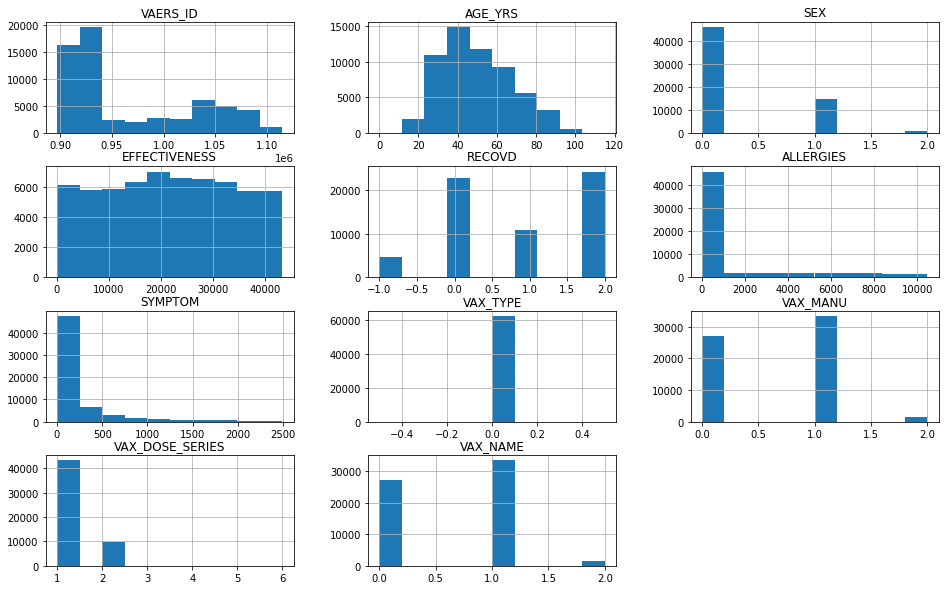

In [ ]:
df.hist(figsize=(16,10))

In [ ]:
#filling missing values of VAERS_ID,AGE_YRS,CAGE_YR with median because it is skewed

df['AGE_YRS']=df['AGE_YRS'].fillna(df['AGE_YRS'].median())
df['VAX_DOSE_SERIES']=df['VAX_DOSE_SERIES'].fillna(df['VAX_DOSE_SERIES'].median())
df['SYMPTOM']=df['SYMPTOM'].fillna(df['SYMPTOM'].median())
#df['ALLERGIES ']=df['ALLERGIES '].fillna(df['ALLERGIES '].median())

In [ ]:
#checking the missing values

df.isnull().sum()

VAERS_ID              0
AGE_YRS               0
SEX                   0
EFFECTIVENESS         0
RECOVD                0
VAX_DATE           1764
ALLERGIES             0
SYMPTOM               0
VAX_TYPE              0
VAX_MANU              0
VAX_DOSE_SERIES       0
VAX_NAME              0
dtype: int64

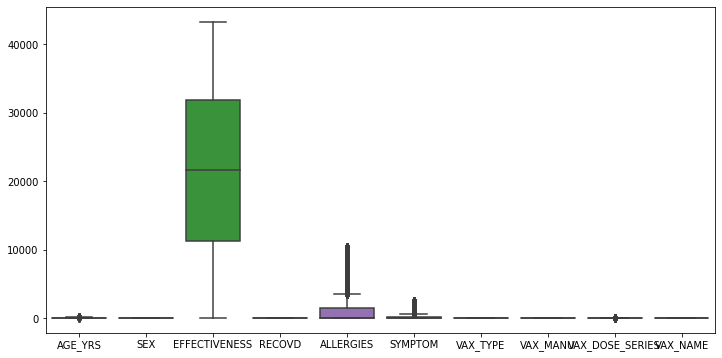

In [ ]:
#checking for outlayer with the help of box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['AGE_YRS','SEX','EFFECTIVENESS','RECOVD','VAX_DATE','ALLERGIES','SYMPTOM','VAX_TYPE',
                     'VAX_MANU','VAX_DOSE_SERIES','VAX_NAME']])

Handling outlayer of AGE

In [ ]:
#Calculate quartile values Q1,Q2,Q3

Q1=np.percentile(df['AGE_YRS'],25,interpolation='midpoint')
Q2=np.percentile(df['AGE_YRS'],50,interpolation='midpoint')
Q3=np.percentile(df['AGE_YRS'],75,interpolation='midpoint')

IQR=Q3-Q1

upper_limit=Q3+(.9*IQR)

lower_limit=Q1-(.9*IQR)

print('Upper limit: ',upper_limit)
print('Lower limit: ',lower_limit)

Upper limit:  82.6
Lower limit:  15.399999999999999


In [ ]:
#Find the indexes of outlier values greater than upper limits in the dataset

index_arr=[]
index_arr=df[df['AGE_YRS']>upper_limit].index
df.drop(index_arr,inplace=True)

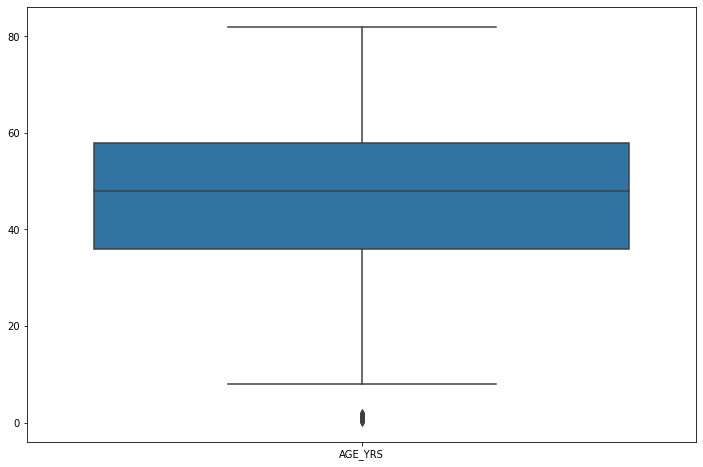

In [ ]:
sns.boxplot(data=df[['AGE_YRS']])

Handling outlayer of ALLERGIES

In [ ]:
#Calculate quartile values Q1,Q2,Q3

Q1=np.percentile(df['ALLERGIES'],25,interpolation='midpoint')
Q2=np.percentile(df['ALLERGIES'],50,interpolation='midpoint')
Q3=np.percentile(df['ALLERGIES'],75,interpolation='midpoint')

IQR=Q3-Q1

upper_limit=Q3+(.9*IQR)

lower_limit=Q1-(.9*IQR)

print('Upper limit: ',upper_limit)
print('Lower limit: ',lower_limit)

Upper limit:  2543.1000000000004
Lower limit:  -1206.1000000000001


In [ ]:
#Find the indexes of outlier values greater than upper limits in the dataset

index_arr2=[]
index_arr2=df[df['ALLERGIES']>upper_limit].index
df.drop(index_arr2,inplace=True)

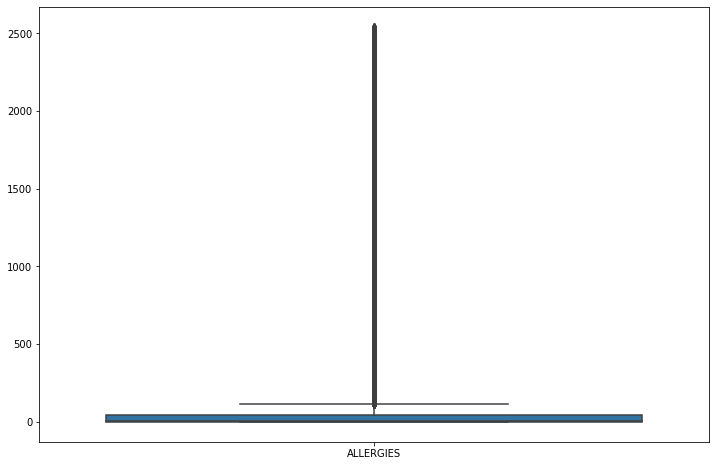

In [ ]:
sns.boxplot(data=df[['ALLERGIES']])

# Visualisation with cleaned data

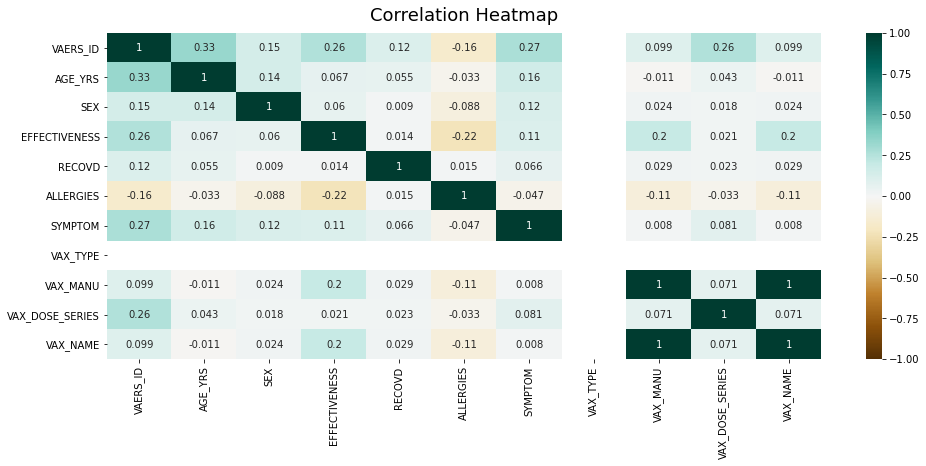

In [ ]:
#histogram representation
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

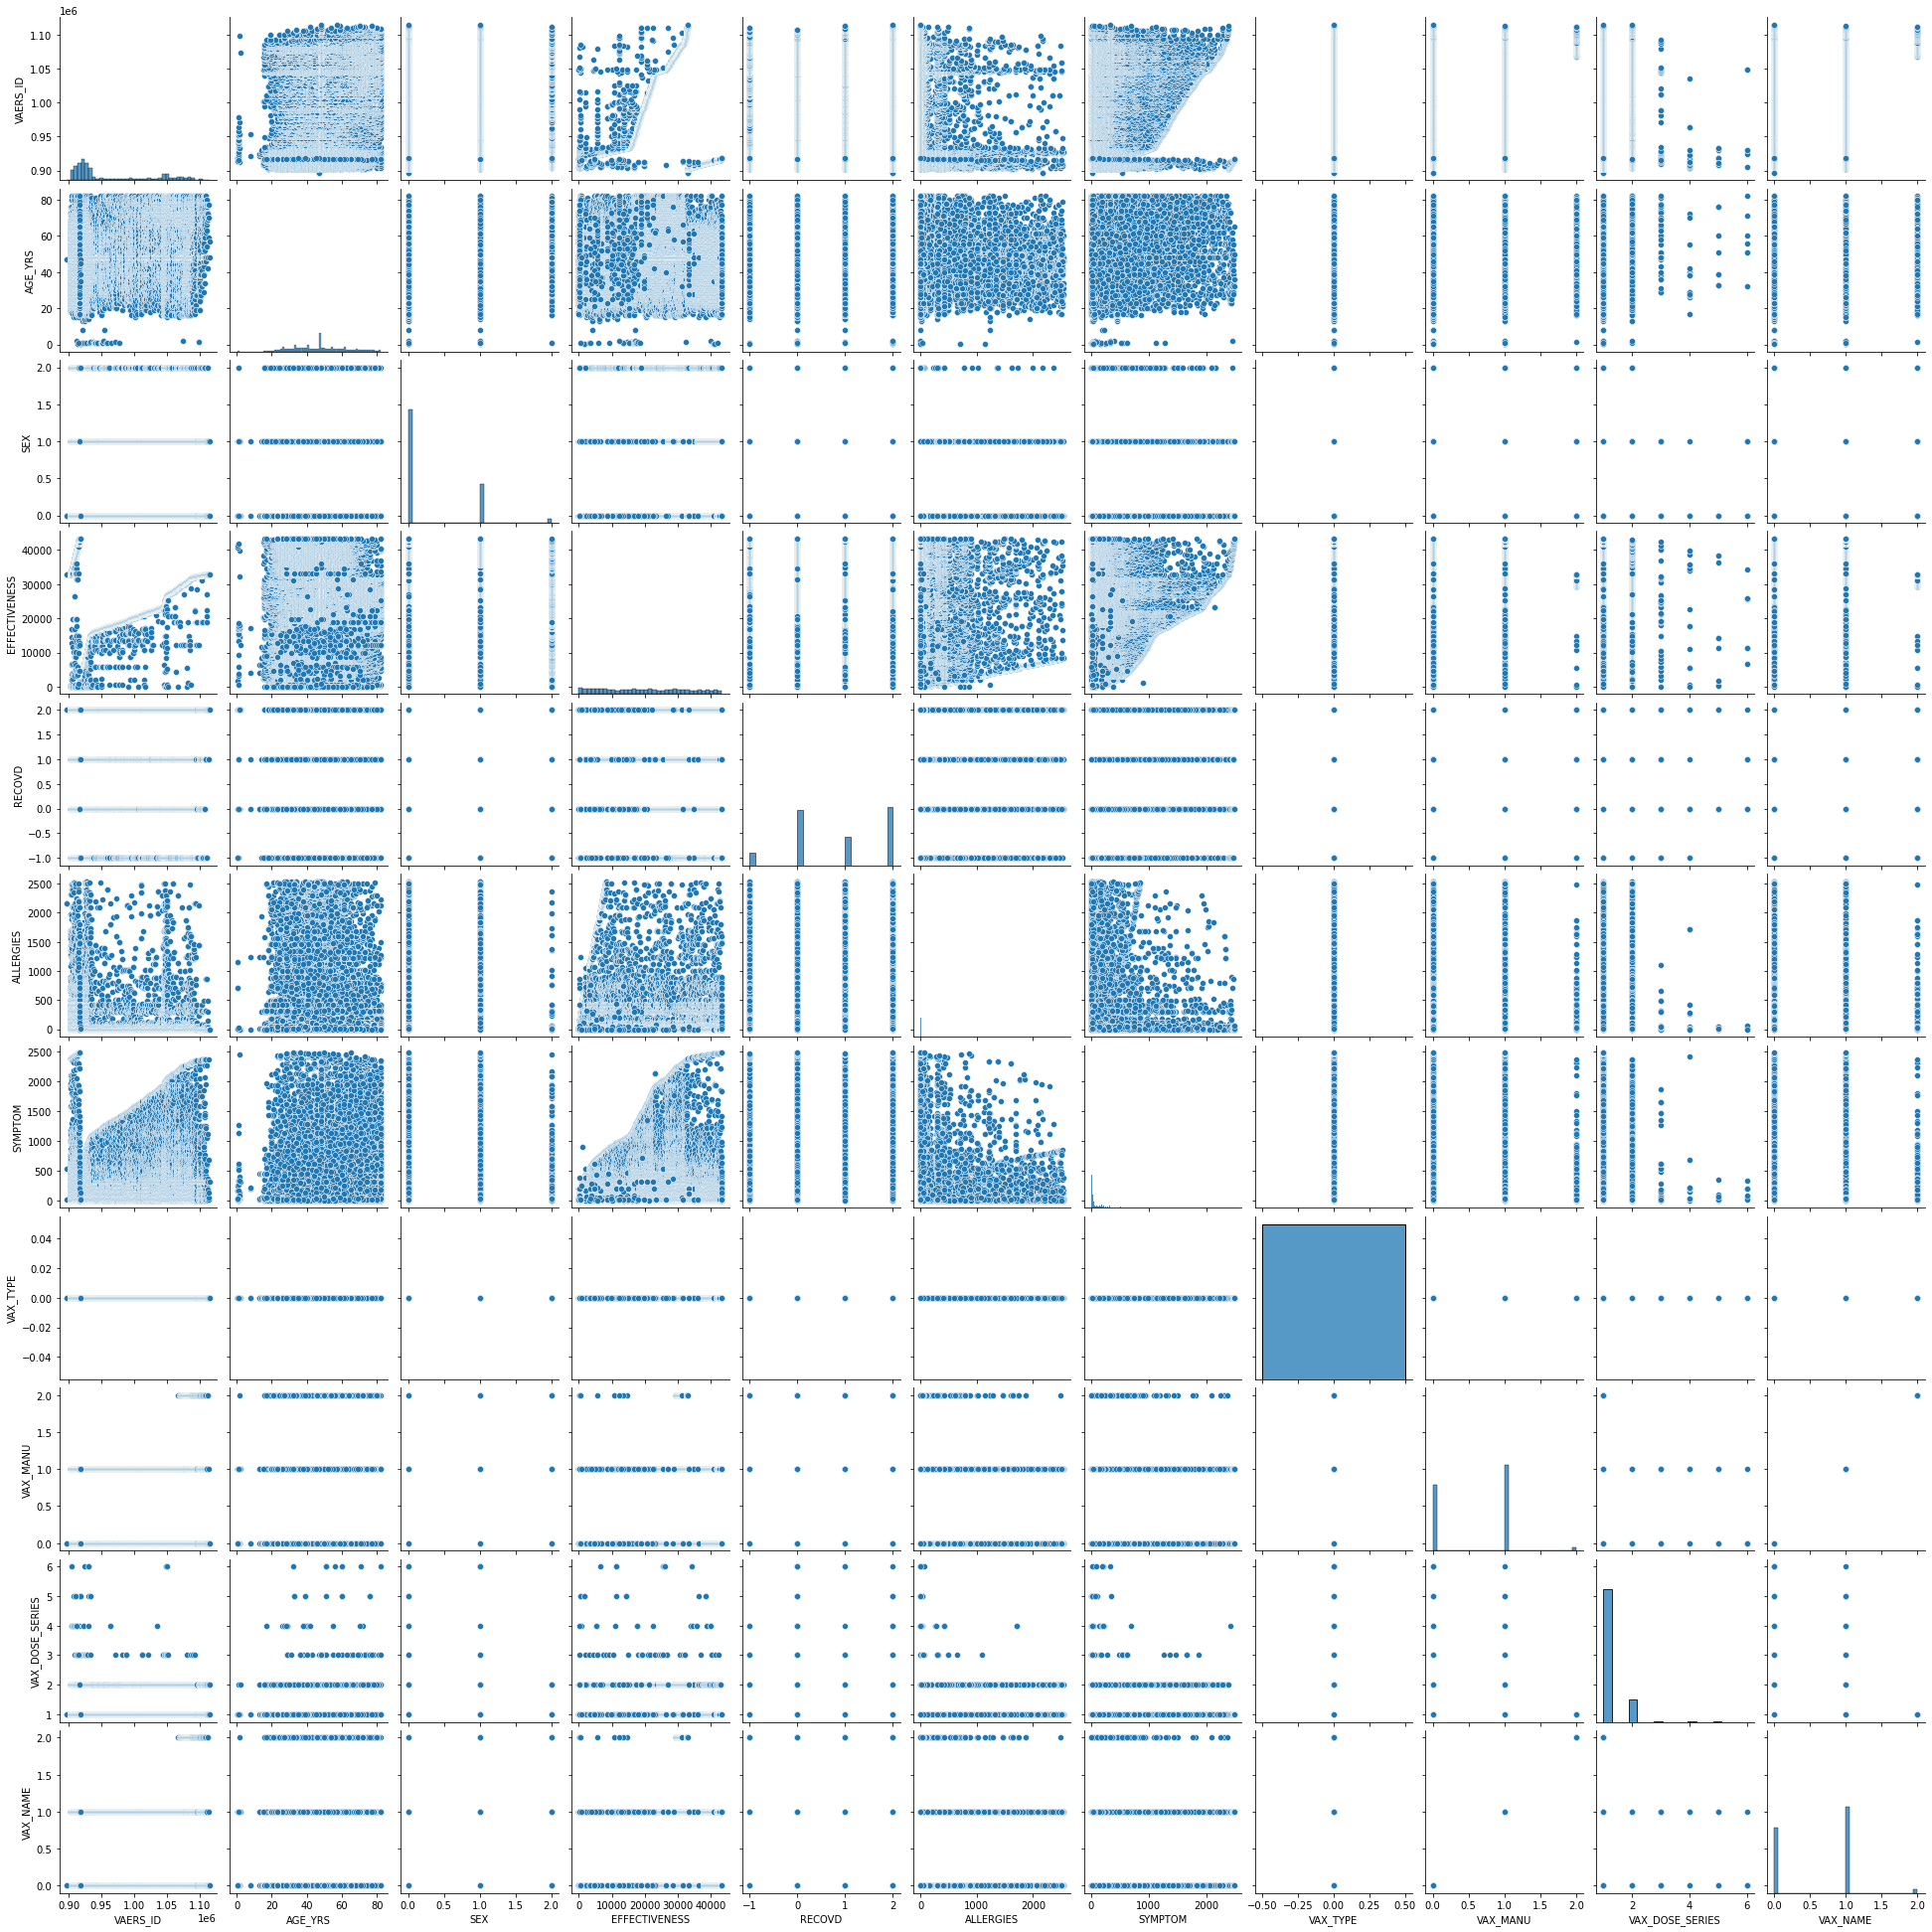

In [ ]:
#pair plot representation for alla features
sns.pairplot(df)

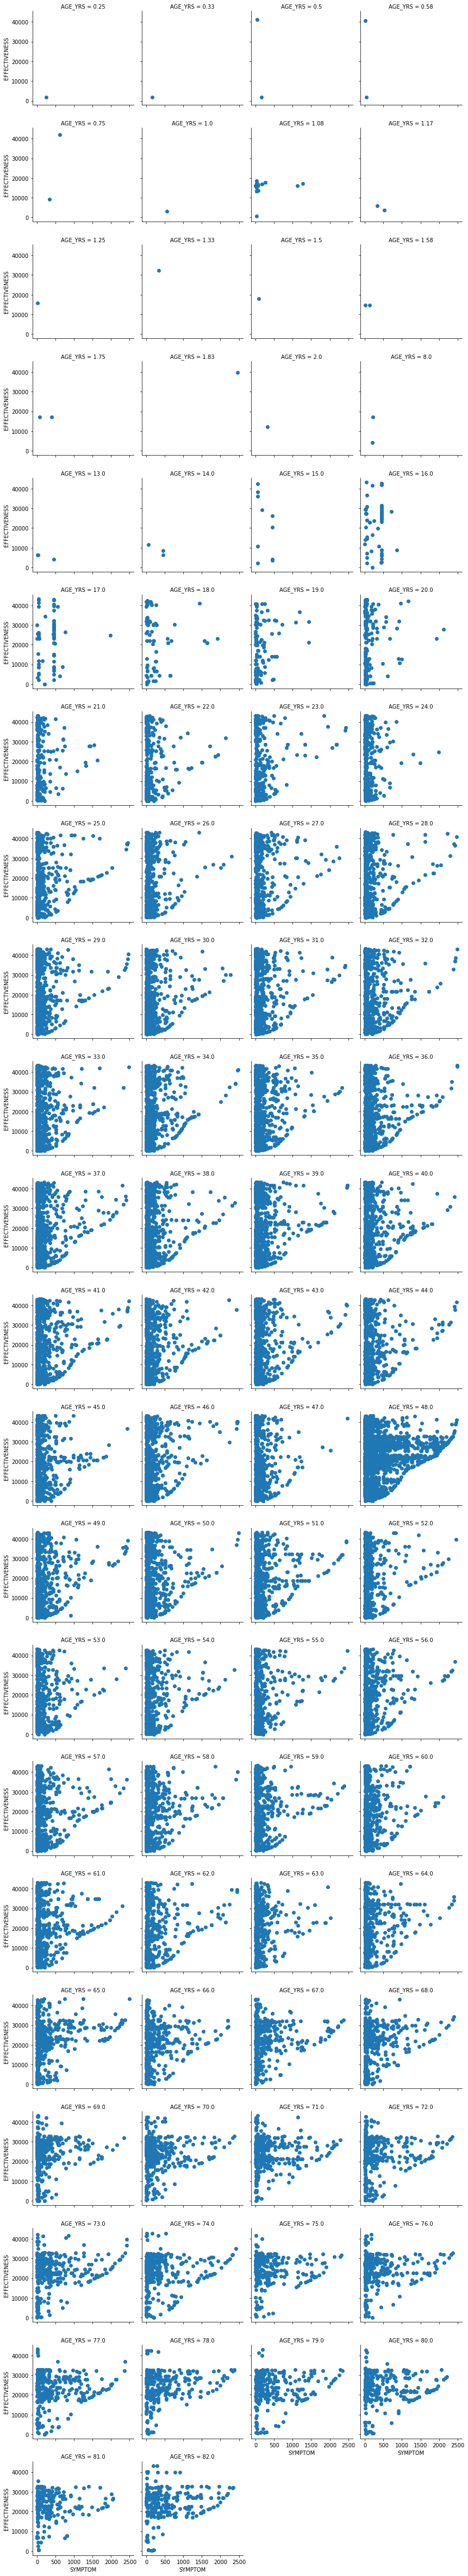

In [ ]:
#representation effectiveness based on age
g = sns.FacetGrid(df, col='AGE_YRS', col_wrap=4)
g.map(plt.scatter, "SYMPTOM","EFFECTIVENESS")
plt.show()

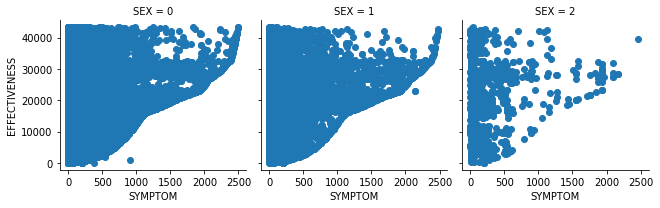

In [ ]:
#representation effectiveness based on gender
g = sns.FacetGrid(df, col='SEX', col_wrap=4)
g.map(plt.scatter, "SYMPTOM","EFFECTIVENESS")
plt.show()

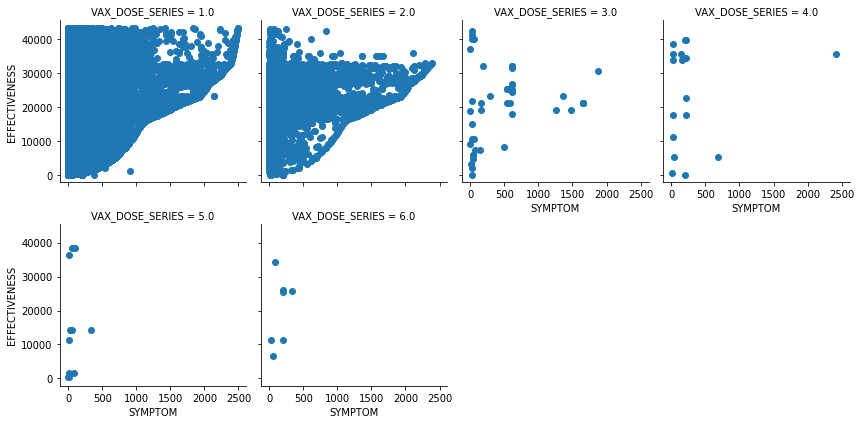

In [ ]:
#representation effectiveness based on vaccine dose
b = sns.FacetGrid(df, col='VAX_DOSE_SERIES', col_wrap=4)
b.map(plt.scatter, "SYMPTOM","EFFECTIVENESS")
plt.show()

# Scaling and Normalizing

In [ ]:
#set the target column and also dropping the vaccine date column from main dataset

target= df.pop('SYMPTOM')

df_new = df.drop(['VAX_DATE'], axis=1)

df_new.head()

VAERS_ID  AGE_YRS  SEX  ...  VAX_MANU  VAX_DOSE_SERIES  VAX_NAME
0    916600     33.0    0  ...         0              1.0         0
1    916601     73.0    0  ...         0              1.0         0
2    916602     23.0    0  ...         1              1.0         1
3    916603     58.0    0  ...         0              1.0         0
4    916604     47.0    0  ...         0              1.0         0

[5 rows x 10 columns]

In [ ]:
df_new.dropna()

VAERS_ID  AGE_YRS  SEX  ...  VAX_MANU  VAX_DOSE_SERIES  VAX_NAME
0        916600     33.0    0  ...         0              1.0         0
1        916601     73.0    0  ...         0              1.0         0
2        916602     23.0    0  ...         1              1.0         1
3        916603     58.0    0  ...         0              1.0         0
4        916604     47.0    0  ...         0              1.0         0
...         ...      ...  ...  ...       ...              ...       ...
62347    916599     44.0    0  ...         1              1.0         1
62348    918247     47.0    0  ...         1              1.0         1
62349    918249     45.0    2  ...         1              1.0         1
62350    918261     39.0    0  ...         0              1.0         0
62351    918441     35.0    0  ...         0              1.0         0

[46507 rows x 10 columns]

In [ ]:
#splitting the data for train and testing

x_train,x_test,y_train,y_test = train_test_split(df_new,target,test_size=0.20,random_state=42)

In [ ]:
#scaling the data

scaler = StandardScaler()
scaler.fit_transform(x_train)
x_train_scl = scaler.transform(x_train)
x_test_scl = scaler.transform(x_test)

In [ ]:
#normalazing the data

norm = Normalizer()
norm.fit_transform(x_train)
x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

# Classification model

# Random Forest

In [ ]:
#using random forest create object and make prediction using testing set
#rf_clf = RandomForestClassifier().fit(x_train,y_train)
#rf_pred = fr_clf.predict(x_test)

In [ ]:
#print the classification details
#print(classification_report(y_test,rf_pred))

In [ ]:
#ploting predicted values
#plt.scatter(y_test, rf_pred)
#plt.xlabel('Measured')
#plt.ylabel('Predicted')
#plt.title('Linear Regression Predicted vs Actual')
#plt.show()

# Decision tree

In [ ]:
#using decision tree create object and make prediction using test set
dtree = DecisionTreeClassifier().fit(x_train,y_train)
dtree_pred = dtree.predict(x_test)

In [ ]:
#print the classification details
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.04      0.04      0.04        26
           1       0.00      0.00      0.00        79
           2       0.02      0.02      0.02        99
           3       0.09      0.10      0.09       355
           4       0.15      0.15      0.15       240
           5       0.07      0.20      0.11         5
           6       0.04      0.04      0.04        68
           7       0.01      0.01      0.01        99
           8       0.00      0.00      0.00        12
           9       0.04      0.04      0.04        93
          10       0.00      0.00      0.00        11
          11       0.03      0.04      0.03        80
          12       0.00      0.00      0.00         1
          13       0.02      0.03      0.03       146
          14       0.00      0.00      0.00         7
          15       0.01      0.02      0.02        45
          16       0.02      0.02      0.02        83
          17       0.11    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#print the accuracy, precision, recall 
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred))
print("Precision:",metrics.precision_score(y_test, dtree_pred, pos_label='positive', average='micro'))
print("Recall:",metrics.recall_score(y_test, dtree_pred, pos_label='positive', average='micro'))

Accuracy: 0.05751451300795528
Precision: 0.05751451300795528
Recall: 0.05751451300795528


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


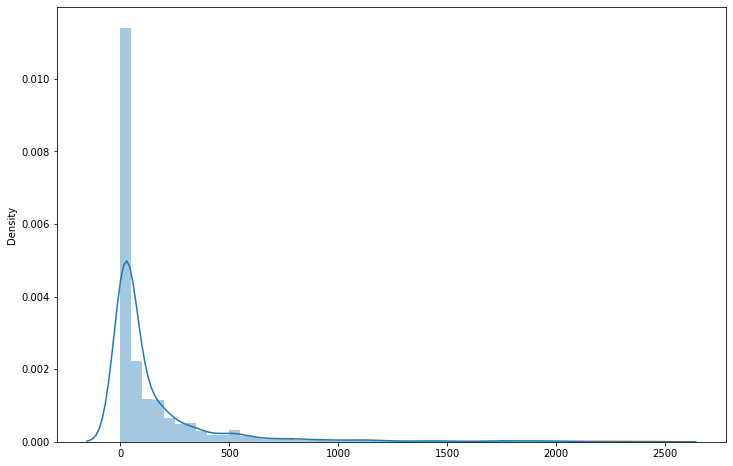

In [ ]:
#ploting predicted values

sns.distplot(dtree_pred)

decision tree with scaling

In [ ]:
dtree.fit(x_train_scl,y_train)
dtree_pred=dtree.predict(x_test_scl)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred))
print("Precision:",metrics.precision_score(y_test, dtree_pred, pos_label='positive', average='micro'))
print("Recall:",metrics.recall_score(y_test, dtree_pred, pos_label='positive', average='micro'))

Accuracy: 0.05762201677058697
Precision: 0.05762201677058697
Recall: 0.05762201677058697


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Decision tree with normalization

In [ ]:
dtree.fit(x_train_norm,y_train)
dtree_pred=dtree.predict(x_test_norm)
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred))
print("Precision:",metrics.precision_score(y_test, dtree_pred, pos_label='positive', average='micro'))
print("Recall:",metrics.recall_score(y_test, dtree_pred, pos_label='positive', average='micro'))

Accuracy: 0.055256933992689744
Precision: 0.055256933992689744
Recall: 0.055256933992689744


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Scaling and Normalisation having no better effect on model

# K-Nearest Neighbours

In [ ]:
#using knn create object and make prediction using testing set
knn = KNeighborsClassifier().fit(x_train,y_train)
knn_pred=knn.predict(x_test)

In [ ]:
#print the classification details
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.01      0.04      0.02        26
           1       0.01      0.04      0.02        79
           2       0.02      0.05      0.02        99
           3       0.05      0.16      0.08       355
           4       0.05      0.16      0.08       240
           5       0.00      0.00      0.00         5
           6       0.03      0.07      0.04        68
           7       0.02      0.05      0.03        99
           8       0.00      0.00      0.00        12
           9       0.03      0.06      0.04        93
          10       0.00      0.00      0.00        11
          11       0.01      0.03      0.01        80
          12       0.00      0.00      0.00         1
          13       0.02      0.04      0.02       146
          14       0.00      0.00      0.00         7
          15       0.01      0.04      0.02        45
          16       0.05      0.10      0.07        83
          17       0.10    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#print the accuracy, precision, recall 
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))
print("Precision:",metrics.precision_score(y_test, knn_pred, pos_label='positive', average='micro'))
print("Recall:",metrics.recall_score(y_test, knn_pred, pos_label='positive', average='micro'))

Accuracy: 0.05815953558374543
Precision: 0.05815953558374543
Recall: 0.05815953558374543


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


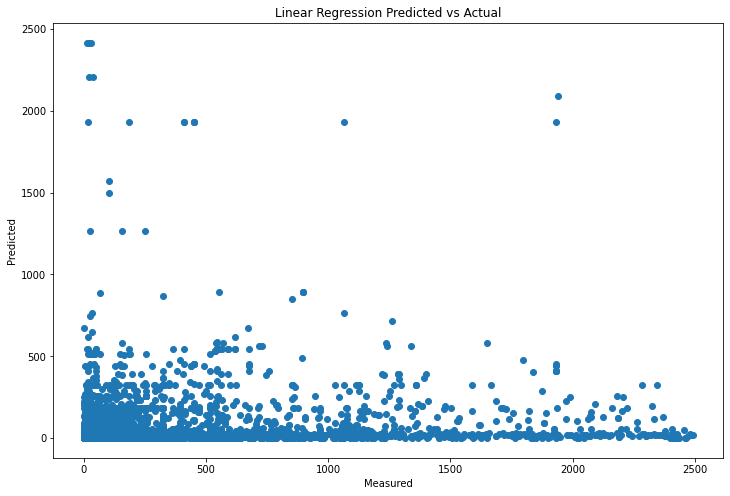

In [ ]:
#ploting predicted values
plt.scatter(y_test, knn_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

# Logistic regression with multiclass

In [ ]:
#using Logistic regression with multiclass create object and make prediction using testing set
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train)
lm_pred = lm.predict(x_test)

In [ ]:
#print the classification details
print(metrics.classification_report(y_test, lm_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        99
           3       0.00      0.00      0.00       355
           4       0.00      0.00      0.00       240
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        99
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        93
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00       146
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        45
          16       0.00      0.00      0.00        83
          17       0.08    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#print the accuracy, precision, recall
print("Accuracy:",metrics.accuracy_score(y_test, lm_pred))
print("Precision:",metrics.precision_score(y_test, lm_pred, pos_label='positive', average='micro'))
print("Recall:",metrics.recall_score(y_test, lm_pred, pos_label='positive', average='micro'))

Accuracy: 0.08234788217587616
Precision: 0.08234788217587616
Recall: 0.08234788217587616


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


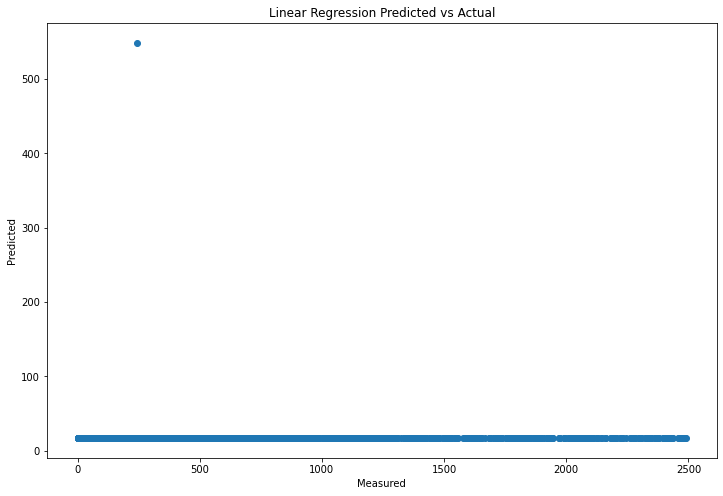

In [ ]:
#ploting predicted values
plt.scatter(y_test, lm_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


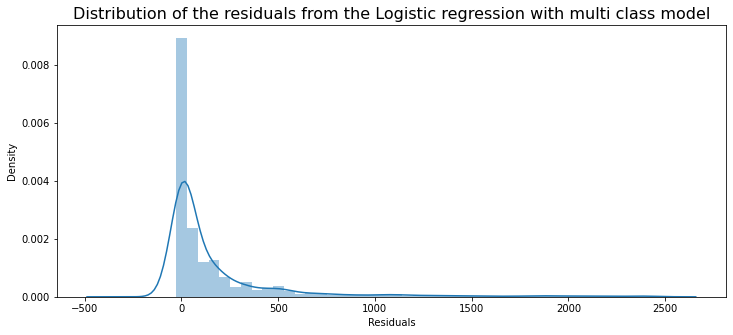

In [ ]:
# calculate the errors
compare_data = pd.DataFrame({'Actual symptoms':y_test,'Predicted symptoms':lm_pred})
compare_data['Residuals'] = y_test-lm_pred
# plot the histogram to see check the normality of the errors
plt.figure(figsize=(12,5))
sns.distplot(compare_data.Residuals,bins=50)
plt.title('Distribution of the residuals from the Logistic regression with multi class model',fontsize=16)
plt.show()

# Naive bayes

In [ ]:
#using Naive bayes create object and make prediction using testing set
nb = GaussianNB().fit(x_train,y_train)
nb_pred = nb.predict(x_test)

In [ ]:
#print the classification details
print(metrics.classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00        99
           3       0.14      0.00      0.01       355
           4       0.05      0.07      0.06       240
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        99
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        93
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00       146
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        45
          16       0.00      0.00      0.00        83
          17       0.09    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#print the accuracy, precision, recall
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))
print("Precision:",metrics.precision_score(y_test, nb_pred, pos_label='positive', average='micro'))
print("Recall:",metrics.recall_score(y_test, nb_pred, pos_label='positive', average='micro'))

Accuracy: 0.01978069232423135
Precision: 0.01978069232423135
Recall: 0.01978069232423135


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


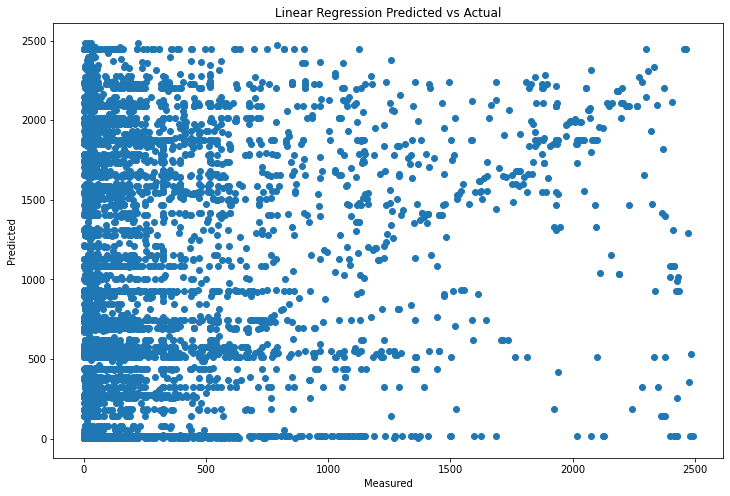

In [ ]:
#ploting predicted values
plt.scatter(y_test, nb_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()